# FIT5149 S2 2020 
# Assessment 1: Predict Bike-Sharing need in Metropolitan Area


Student information
- Family Name: Pettit
- Given Name: Michael
- Student ID: 28746511
- Student email: mhal0003@student.monash.edu

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- pandas
- ggplot2
- reshape2
- dplyr

## Table of Contents

1. [Introduction](#sec_1)
3. [Exploratory Data Analysis](#sec_3)
3. [Methodology](#sec_4)
3. [Model Development](#sec_5)
3. [Results and discussion](#sec_6)
3. [Conclusion](#sec_7)
3. [References](#sec_8)

## 1. Introduction <a class="anchor" id="sec_1"></a>

In this task we will be exploring electricity bills and the factors that contribute to them. Electricity bills have noticably increased to record highs causing affordability concerns. The goal of the task is to compare several models to determine which predictors could be used to determine the electricity bill. Several models and measures will be used and compared, it is to be noted that the goal of this task is to compare the models and affect of the predictors and not to determine a one best model 

Initally we are given a dataset of 1000 records with 10 predictors used to determine the monthly electricity bill (marked as 'amount_paid'). Thus we can load our data and then begin conducting the analysis

In [114]:
# Load the data
data <- read.csv("FIT5149_Assessment1.csv", header = TRUE)

Once we have loaded the data we can use the <a href="https://stat.ethz.ch/R-manual/R-devel/library/utils/html/str.html"><font color="orange">str()</font></a> function to give us more information about the columns, data types, number of variables and the number of observations

In [115]:
# Take a brief look at the strcuture of the dataset
str(data)

'data.frame':	1000 obs. of  11 variables:
 $ num_rooms         : int  3 1 3 0 1 0 4 3 2 1 ...
 $ num_people        : int  3 5 1 5 8 5 5 4 4 6 ...
 $ housearea         : num  743 953 761 861 732 ...
 $ is_ac             : int  1 0 1 1 0 0 0 0 1 0 ...
 $ is_tv             : int  1 1 1 1 1 1 1 0 0 0 ...
 $ is_flat           : int  1 0 1 0 0 1 0 1 0 0 ...
 $ ave_monthly_income: num  4838 17532 11146 6070 8615 ...
 $ num_children      : int  2 1 0 0 2 2 1 2 0 2 ...
 $ is_urban          : int  0 1 0 0 1 1 1 1 1 1 ...
 $ month             : int  1 1 1 1 1 1 1 1 1 1 ...
 $ amount_paid       : num  112.1 126.7 102.4 66.6 131.7 ...


## 2. Exploratory Data Analysis<a class="anchor" id="sec_3"></a>

Before we conduct our analysis and begin building models for our dataset, we want to take a deeper look into our data and ensure that there are no issues with any of the instances.

In [116]:
# Get summary statistics of the data
summary(data)

   num_rooms        num_people       housearea          is_ac      
 Min.   :-1.000   Min.   :-1.000   Min.   : 244.4   Min.   :0.000  
 1st Qu.: 1.000   1st Qu.: 4.000   1st Qu.: 691.0   1st Qu.:0.000  
 Median : 2.000   Median : 5.000   Median : 790.0   Median :0.000  
 Mean   : 1.962   Mean   : 4.897   Mean   : 794.7   Mean   :0.376  
 3rd Qu.: 3.000   3rd Qu.: 6.000   3rd Qu.: 893.0   3rd Qu.:1.000  
 Max.   : 5.000   Max.   :11.000   Max.   :1189.1   Max.   :1.000  
     is_tv          is_flat      ave_monthly_income  num_children  
 Min.   :0.000   Min.   :0.000   Min.   : -788.2    Min.   :0.000  
 1st Qu.:1.000   1st Qu.:0.000   1st Qu.: 9018.4    1st Qu.:0.000  
 Median :1.000   Median :0.000   Median :12371.3    Median :1.000  
 Mean   :0.798   Mean   :0.477   Mean   :12342.5    Mean   :1.078  
 3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:15701.2    3rd Qu.:2.000  
 Max.   :1.000   Max.   :1.000   Max.   :28265.5    Max.   :4.000  
    is_urban         month       amount_paid    

We can see just based on the summary that there could be some room to filter or clean our data, for instance in the num_rooms, num_people and ave_monthly_income we can see negative results. These do not make much logical sense, you cannot have -1 rooms in a house, cannot have -1 people in a house and cannot have a monthly income of less than 0. Thus, it seems as though we can clean some aspects of our data before beginning with the analysis

In [117]:
# Check the dimensions of the data
dim(data)

[1] 1000   11

This is consistent with the information given in the assessment brief; there are 1000 instances of the data with 10 predictors used to determine the electricity bill

In [118]:
# Take a look at the first few rows of the data
head(data)

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,3,3,742.57,1,1,1,4837.97,2,0,1,112.0963
2,1,5,952.99,0,1,0,17532.40,1,1,1,126.6567
3,3,1,761.44,1,1,1,11146.22,0,0,1,102.3758
4,0,5,861.32,1,1,0,6069.54,0,0,1,66.5984
5,1,8,731.61,0,1,0,8615.05,2,1,1,131.6571
6,0,5,837.24,0,1,1,12330.91,2,1,1,158.6485


Next, we are going to take a look at each of the vairables and how each of them are distributed using a boxplot. This is a standard way of viewing the summary statistics which were also displayed earlier. This will make it easier to see potential outliers or transformations that could be made to be suit the data

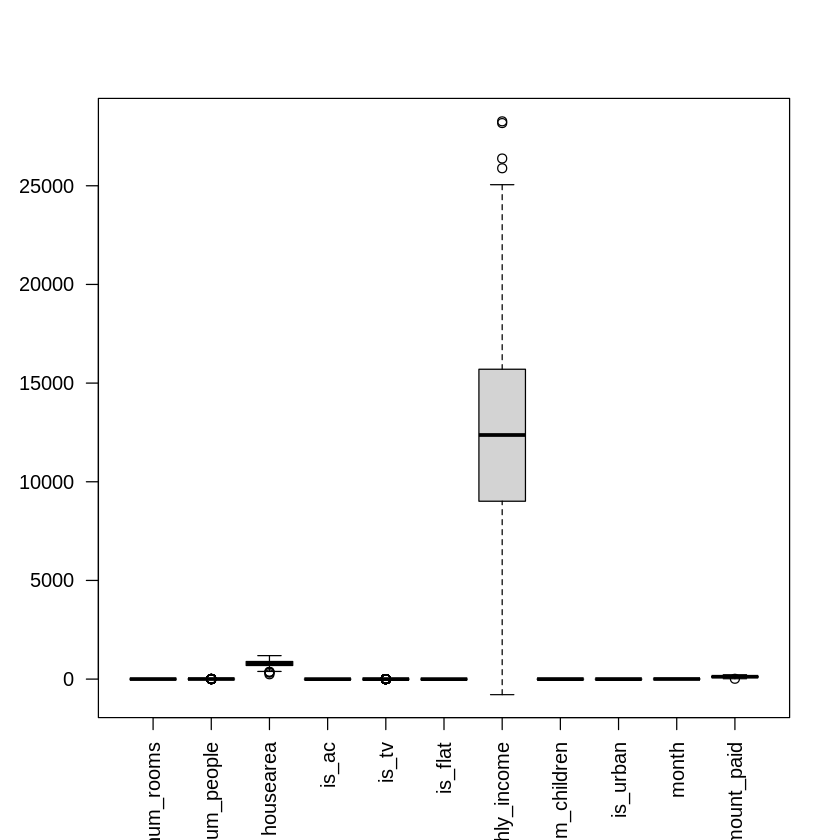

In [119]:
boxplot(data, las=2, cex.axis = 1)

We can see that the ave_monthly_income variable is much larger than all the variables making it difficult to explore each of the other variables, hence we should look at each individually and not as one large set

In [120]:
install.packages('reshape2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



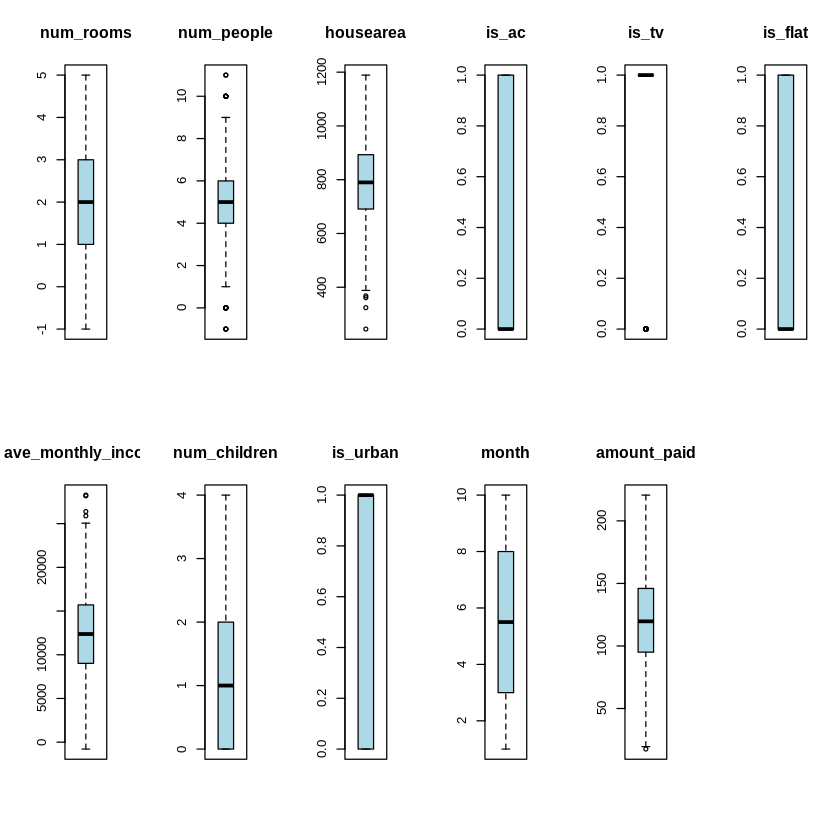

In [121]:
library(ggplot2)
library(reshape2)

# or you can plot them all in a loop, notice the different scales now
par(mfrow = c(2,6)) # 6 x 2 grid
for (i in 1:(length(data))) {
        boxplot(data[,i], main = names(data[i]), type="l", col = 'lightblue')
}

Now we the boxplots for all the variables with different scales for each of them

Next, we want to test the correlation between variables and see if there are any strong relationships between variables. To visualise this we can use the <a href="https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/pairs.html">pairs()</a> function

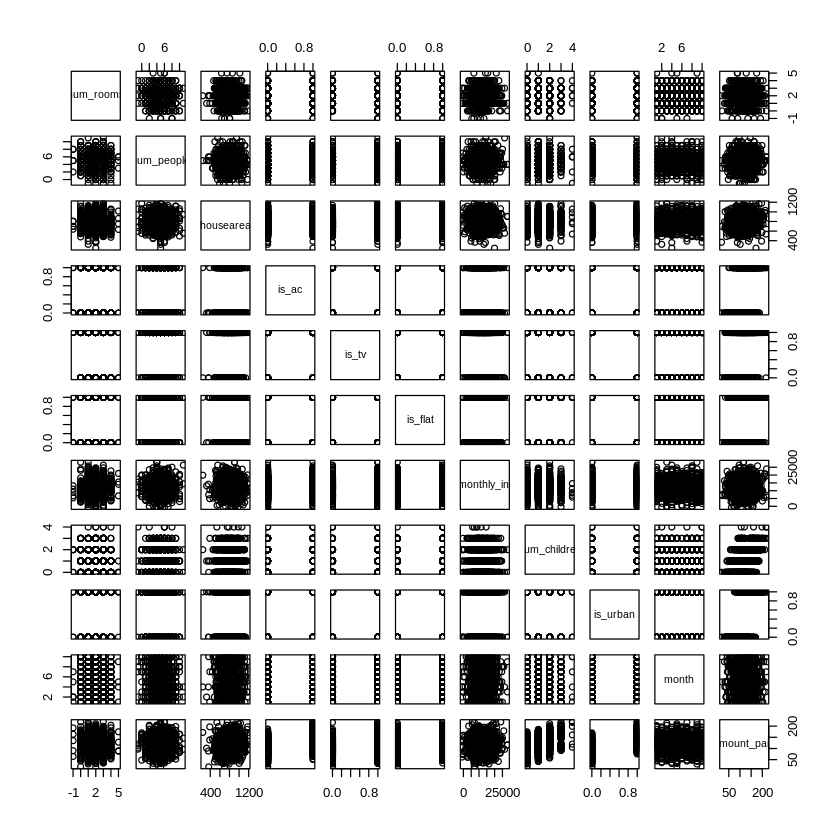

In [122]:
pairs(data)

From just looking at the plots, we can see that some variables look to have a strong relationship with the amount_paid variable and some do not. Variables such as month, num_rooms, ave_monthly_income, num_people and housearea all look to little to no relationship with each of those plots have no direction or pattern. However, some of the other indicator variables look to have a strong impact on the amount_paid variable, we can see that is_urban, is_flat, is_tv and is_ac have start differences depending on if they are indicated or not

To quantify the correlation beteen two variables we can use the <font color="red">cor()</font> function

In [123]:
# Take a look at the correlation between variables
round(cor(data),3)

,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,month,amount_paid
num_rooms,1.000,-0.006,-0.034,0.019,-0.016,0.004,0.000,-0.037,-0.016,0.024,-0.024
num_people,-0.006,1.000,0.000,0.034,0.020,0.012,0.019,-0.011,-0.024,-0.031,0.054
housearea,-0.034,0.000,1.000,0.036,0.088,0.008,-0.043,0.039,0.025,0.066,0.096
is_ac,0.019,0.034,0.036,1.000,0.000,0.003,-0.014,-0.027,-0.053,0.002,0.390
is_tv,-0.016,0.020,0.088,0.000,1.000,-0.028,0.014,0.015,0.035,-0.050,0.198
is_flat,0.004,0.012,0.008,0.003,-0.028,1.000,-0.015,-0.028,0.000,-0.040,0.148
ave_monthly_income,0.000,0.019,-0.043,-0.014,0.014,-0.015,1.000,0.008,-0.039,-0.009,0.026
num_children,-0.037,-0.011,0.039,-0.027,0.015,-0.028,0.008,1.000,-0.008,0.007,0.448
is_urban,-0.016,-0.024,0.025,-0.053,0.035,0.000,-0.039,-0.008,1.000,-0.004,0.650
month,0.024,-0.031,0.066,0.002,-0.050,-0.040,-0.009,0.007,-0.004,1.000,-0.001


We can see based on the correlation table that many of the variables just mentioned not looking to have a strong linear relationship with amount_paid also do not have a strong correlation with amount_paid either. We can see that some of the indicator variables do have a somewhat strong correlation, notiably the variables of is_urban, is_ac and num_children having the highest correlation with the amount_paid. This will be interesting to note and see if these 3 variables are used in each model and how they will rank among their relative frequenies later on

## 3. Methodology<a class="anchor" id="sec_4"></a>

Now that we have explored some of data, we want to split our data into training and test datasets. As mentioned in the assignmeny briefing, we want to use the first 800 instances as the training set and the last 200 as the test dataset. After spliting the data we can conduct the cleaning and filtering of each of the datasets to remove unnecessary and incorrect data before we start to build models and compare them

### 3.1 Split Training and Test Set

In [124]:
train = data[0:800, ]

In [125]:
test = data[801:1000, ]

Now that we have split our data into the training and test datasets, we want to perform a little bit of cleaning to remove the illogical data mentioned previously

### 3.2 Check data columns 

We can see the negative results in the num_rooms, num_people and ave_monthly_income columns so we want to remove those

We can also look at each of the columns individually to see if anything from those columns doesn't make sense

In [126]:
library("dplyr")

In [127]:
# Check the number of rooms column
data %>% group_by(num_rooms) %>% summarize(count=n())

num_rooms,count
<int>,<int>
-1,5
0,65
1,257
2,373
3,240
4,56
5,4


We can see that there are 5 instances of -1 rooms in a house, which we would like to remove

In [128]:
# Check the number of people in the house
data %>% group_by(num_people) %>% summarize(count=n())

num_people,count
<int>,<int>
-1,4
0,13
1,33
2,72
3,96
4,187
5,224
6,174
7,104


There are 4 instances of -1 people in a house that we should also remove

In [129]:
# Check the is_ac column
data %>% group_by(is_ac) %>% summarize(count=n())

is_ac,count
<int>,<int>
0,624
1,376


In [130]:
# Check the is_tv column
data %>% group_by(is_tv) %>% summarize(count=n())

is_tv,count
<int>,<int>
0,202
1,798


In [131]:
# Check the is_flat column
data %>% group_by(is_flat) %>% summarize(count=n())

is_flat,count
<int>,<int>
0,523
1,477


In [132]:
# Check the num_children column
data %>% group_by(num_children) %>% summarize(count=n())

num_children,count
<int>,<int>
0,316
1,368
2,244
3,66
4,6


In [133]:
# Check the is_urbane column
data %>% group_by(is_urban) %>% summarize(count=n())

is_urban,count
<int>,<int>
0,392
1,608


In [134]:
# Check the month column 
data %>% group_by(month) %>% summarize(count=n())

month,count
<int>,<int>
1,100
2,100
3,100
4,100
5,100
6,100
7,100
8,100
9,100


### 3.3 Clean Data

Other than the aforementioned issues with the data, the result of the columns don't look to have any other issues or any issues that can be justified to be a mistake. Thus, onces these few issues are cleaned, no other problems will be checked and the data will then be used

In [135]:
data_2 = data %>% filter(num_rooms >= 0) %>% filter(num_people >= 0) %>% filter(ave_monthly_income >= 0)

In [136]:
dim(data_2)

[1] 985  11

We can see that 15 columns have been removed from the dataset, now we can set up our new training and test datasets. As we have no re-indexed our original file each index should still be the same. We can also check this before completing the process

In [137]:
train = train %>% filter(num_rooms >= 0) %>% filter(num_people >= 0) %>% filter(ave_monthly_income >= 0)

In [138]:
dim(train)

[1] 786  11

In [139]:
test = test %>% filter(num_rooms >= 0) %>% filter(num_people >= 0) %>% filter(ave_monthly_income >= 0)

In [140]:
dim(test)

[1] 199  11

Thus, we can see that 14 rows have been removed from the training dataset and 1 row removed from the test dataset which is consistent with what we have seen with the entire dataset. Hence, we can now begin to build our models 

## 4. Model Development <a class="anchor" id="sec_5"></a>

### 4.1 Linear Regression

The first models we can use is the most common, a Linear Regression model. We can see that some of the variables look to have no linear relationship with the amount paid and others do. Hence, we can build several multiple linear regression models and see how well the model predicts the amount_paid

We can initally try using the full model, hence, use all the predictors given in the dataset to predict the amount_paid.

In [141]:
# Create linear regression model using lm function
full_model = lm(amount_paid ~ ., data = train)

In [142]:
# summarise model
summary(full_model)


Call:
lm(formula = amount_paid ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.7416 -10.6600   0.0505   9.6692  25.4156 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         2.630e+01  3.403e+00   7.729 3.37e-14 ***
num_rooms          -2.046e-01  4.415e-01  -0.464 0.643128    
num_people          8.820e-01  2.264e-01   3.896 0.000106 ***
housearea           5.947e-03  3.042e-03   1.955 0.050974 .  
is_ac               3.331e+01  9.243e-01  36.039  < 2e-16 ***
is_tv               1.444e+01  1.126e+00  12.820  < 2e-16 ***
is_flat             1.163e+01  8.954e-01  12.988  < 2e-16 ***
ave_monthly_income  3.633e-04  9.553e-05   3.803 0.000154 ***
num_children        1.821e+01  4.872e-01  37.370  < 2e-16 ***
is_urban            5.010e+01  9.196e-01  54.476  < 2e-16 ***
month               2.182e-01  1.960e-01   1.113 0.265881    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard 

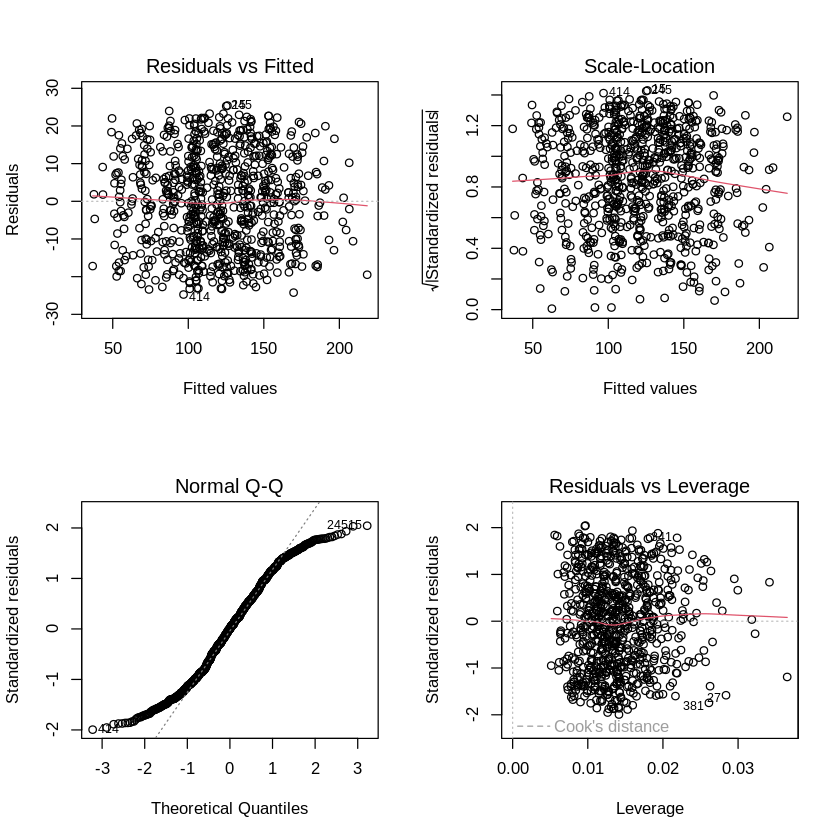

In [143]:
# Diagnostic Plots
par(mfcol=c(2,2))
plot(full_model)

In [144]:
# Training MSE
train_pred.lm <- predict(full_model, train)
mean((train_pred.lm - train$amount_paid)^2)

[1] 153.9438

In [145]:
# Test MSE
pred.lm <- predict(full_model, test)
mean((pred.lm - test$amount_paid)^2)

[1] 172.8446

In [146]:
# R2
model_R2 <- 1 - (sum((test$amount_paid-predict(full_model, test))^2)/sum((test$amount_paid-mean(test$amount_paid))^2))
model_R2

[1] 0.8741625

From the above analysis we can see using a multiple linear regression with all the predictors provides a comprehensive result with a MSE value of just under 173. We can also see that not all 10 predictors are significnt, meaning there is a chance that we are overfitting the model and creating unnecessart noise. 

Next we have the diagnostic plots that show our residuals in 4 ways, the Residuals vs Fitted show if there is a non linear relationship or not. As there is an even spread and no disernable pattern, this is a good indication that there is indeed a linear relationship. The Q-Q plot checks for the plausability that the data comes from a theoretical distribution. In the case of the Normal Q-Q above, checks to see if our residuals are normally distributed, as there is significnat deviation from the tails we can assume this is not the case. The scale-location plot checks the assumption of equal variance, there looks to be an even spread but the line isn't directly horizontal. Finally, the Residual vs Leverage plot is used to identify influential data points. In this plot we want to look for outliers that could potentially influence our dataset.

The next logical model to try is that of a stepwise function. As we have seen, our model has some predictors that look to have little to no impact on the amount_paid. Hence, we can use a stepwise function to remove any unnecessary predictors to improve the model until no further improvements can be made

In [147]:
# Use step function to perform stepwise selection
step1 <- step(full_model)

Start:  AIC=3980.76
amount_paid ~ num_rooms + num_people + housearea + is_ac + is_tv + 
    is_flat + ave_monthly_income + num_children + is_urban + 
    month

                     Df Sum of Sq    RSS    AIC
- num_rooms           1        34 121033 3979.0
- month               1       194 121193 3980.0
<none>                            121000 3980.8
- housearea           1       597 121596 3982.6
- ave_monthly_income  1      2258 123257 3993.3
- num_people          1      2370 123370 3994.0
- is_tv               1     25659 146659 4129.9
- is_flat             1     26338 147338 4133.6
- is_ac               1    202778 323778 4752.4
- num_children        1    218038 339037 4788.6
- is_urban            1    463335 584335 5216.5

Step:  AIC=3978.98
amount_paid ~ num_people + housearea + is_ac + is_tv + is_flat + 
    ave_monthly_income + num_children + is_urban + month

                     Df Sum of Sq    RSS    AIC
- month               1       190 121224 3978.2
<none>                 

In [148]:
# Summarise model
summary(step1)


Call:
lm(formula = amount_paid ~ num_people + housearea + is_ac + is_tv + 
    is_flat + ave_monthly_income + num_children + is_urban, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-24.3442 -10.5299   0.2203   9.8015  24.6585 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.674e+01  3.145e+00   8.502  < 2e-16 ***
num_people         8.758e-01  2.260e-01   3.875 0.000116 ***
housearea          6.249e-03  3.031e-03   2.062 0.039525 *  
is_ac              3.330e+01  9.233e-01  36.060  < 2e-16 ***
is_tv              1.435e+01  1.122e+00  12.795  < 2e-16 ***
is_flat            1.159e+01  8.939e-01  12.966  < 2e-16 ***
ave_monthly_income 3.635e-04  9.543e-05   3.809 0.000151 ***
num_children       1.822e+01  4.863e-01  37.468  < 2e-16 ***
is_urban           5.011e+01  9.192e-01  54.520  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.49 on 777 degrees of free

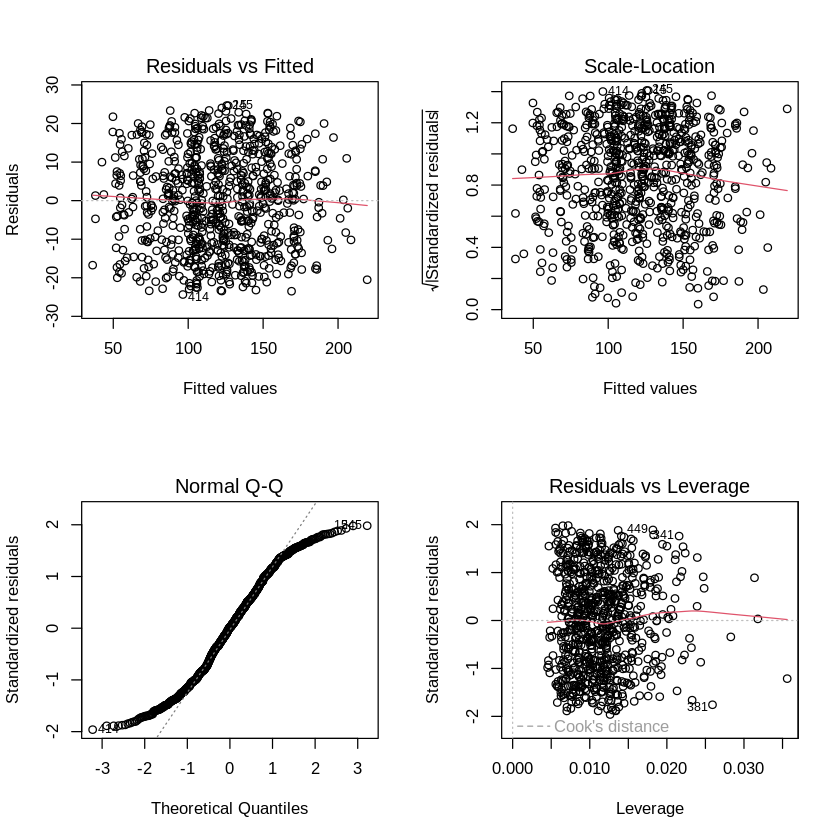

In [149]:
# Diagnostic Plots
par(mfcol=c(2,2))
plot(step1)

In [235]:
step1$coefficients

(Intercept)         num_people          housearea              is_ac 
      2.673775e+01       8.758272e-01       6.249463e-03       3.329569e+01 
             is_tv            is_flat ave_monthly_income       num_children 
      1.435349e+01       1.159031e+01       3.634613e-04       1.822059e+01 
          is_urban 
      5.011413e+01

In [150]:
# Training MSE
train_step_pred.lm <- predict(step1, train)
mean((train_step_pred.lm - train$amount_paid)^2)

[1] 154.2288

In [151]:
# Test MSE
pred.step <- predict(step1, test)
mean((pred.step - test$amount_paid)^2)

[1] 172.0871

In [152]:
# R2
step_R2 <- 1 - (sum((test$amount_paid-predict(step1, test))^2)/sum((test$amount_paid-mean(test$amount_paid))^2))
step_R2

[1] 0.874714

We can see that the stepwise function has produced a lower MSE, having first removed the num_rooms variables followed by the month variable. This variables were considered insignificant by the AIC, but removing any more variables would not have made the model any better according to the AIC. Many of the plots look very similar to the previous full model plots and thus have the same inclinations and assumpotions as those. The summary of the model also shows that now all the variables are statistically significant and hence should provide a better result than the full model as it has shown

Now we have 2 different models to compare, the full modeland stepwise selction model. We can see so far that the stepwise model has been shown to predict the amount_paid better than the full model

### 4.2 Linear Model Selection and Regularization

We can see that the stepwise model takes a subset of the variables used in the original model. Hence, we can take a more exhaustive approach in choosing the relative variables and choose the variables that have the strongest assosciation with our response variable

For this model we want a maximum of 10 predictors up to the 4th dimension and we can use  <font color="red"> regsubsets()</font> to achieve this

In [153]:
install.packages("leaps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [154]:
library(leaps)

In [155]:
regfit.full <- regsubsets(amount_paid ~ num_rooms + num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban + month + 
I((num_rooms + num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban + month)^2) +
I((num_rooms + num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban + month)^3) + 
I((num_rooms + num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban + month)^4), 
data = train, nvmax = 10)

The summary() function will output the best set of variables for each model size from 1 to 4.

In [156]:
reg.summary <- summary(regfit.full)
reg.summary

Subset selection object
Call: regsubsets.formula(amount_paid ~ num_rooms + num_people + housearea + 
    is_ac + is_tv + is_flat + ave_monthly_income + num_children + 
    is_urban + month + I((num_rooms + num_people + housearea + 
    is_ac + is_tv + is_flat + ave_monthly_income + num_children + 
    is_urban + month)^2) + I((num_rooms + num_people + housearea + 
    is_ac + is_tv + is_flat + ave_monthly_income + num_children + 
    is_urban + month)^3) + I((num_rooms + num_people + housearea + 
    is_ac + is_tv + is_flat + ave_monthly_income + num_children + 
    is_urban + month)^4), data = train, nvmax = 10)
13 Variables  (and intercept)
                                                                                                                           Forced in
num_rooms                                                                                                                      FALSE
num_people                                                                         

In [157]:
names(reg.summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

Now we can use Mallows Cp to find the best overall model and the amount of predictors

[1] 8

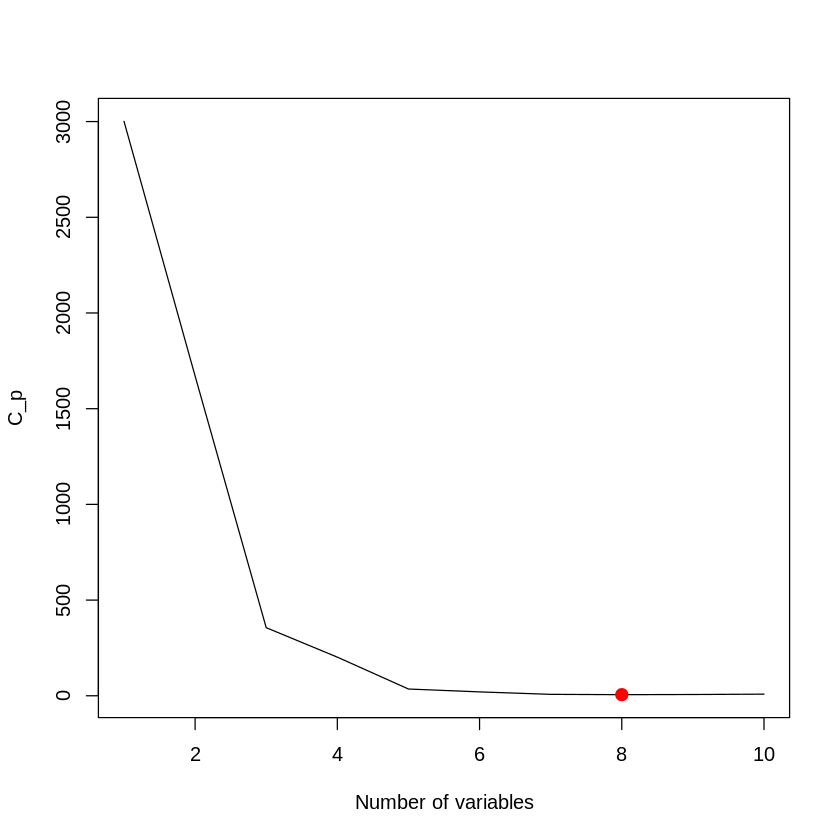

In [158]:
plot(reg.summary$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
mincp = which.min(reg.summary$cp)
points(mincp, reg.summary$cp[mincp], col = "red", cex = 2, pch = 20)
mincp

The plot suggests that the best overall model contains 8 variables 

In [159]:
coef(regfit.full, mincp)

(Intercept) 
                                                                                                              2.899691e+01 
                                                                                                                num_people 
                                                                                                              8.761023e-01 
                                                                                                                 housearea 
                                                                                                              5.805848e-03 
                                                                                                                     is_ac 
                                                                                                              3.327057e+01 
                                                                                                                     is_tv 
                                                                                                              1.441122e+01 
                                                                                                                   is_flat 
                                                                                                              1.158114e+01 
                                                                                                              num_children 
                                                                                                              1.824009e+01 
                                                                                                                  is_urban 
                                                                                                              5.007648e+01 
I((num_rooms + num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban + month)^2) 
                                                                                                              1.307879e-08

We can also use some other metrics to find the optimal amount of variables

Try the BIC

(Intercept) 
                                                                                                              3.339609e+01 
                                                                                                                num_people 
                                                                                                              8.782057e-01 
                                                                                                                     is_ac 
                                                                                                              3.331016e+01 
                                                                                                                     is_tv 
                                                                                                              1.457872e+01 
                                                                                                                   is_flat 
                                                                                                              1.154051e+01 
                                                                                                              num_children 
                                                                                                              1.827636e+01 
                                                                                                                  is_urban 
                                                                                                              5.012389e+01 
I((num_rooms + num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban + month)^2) 
                                                                                                              1.303201e-08

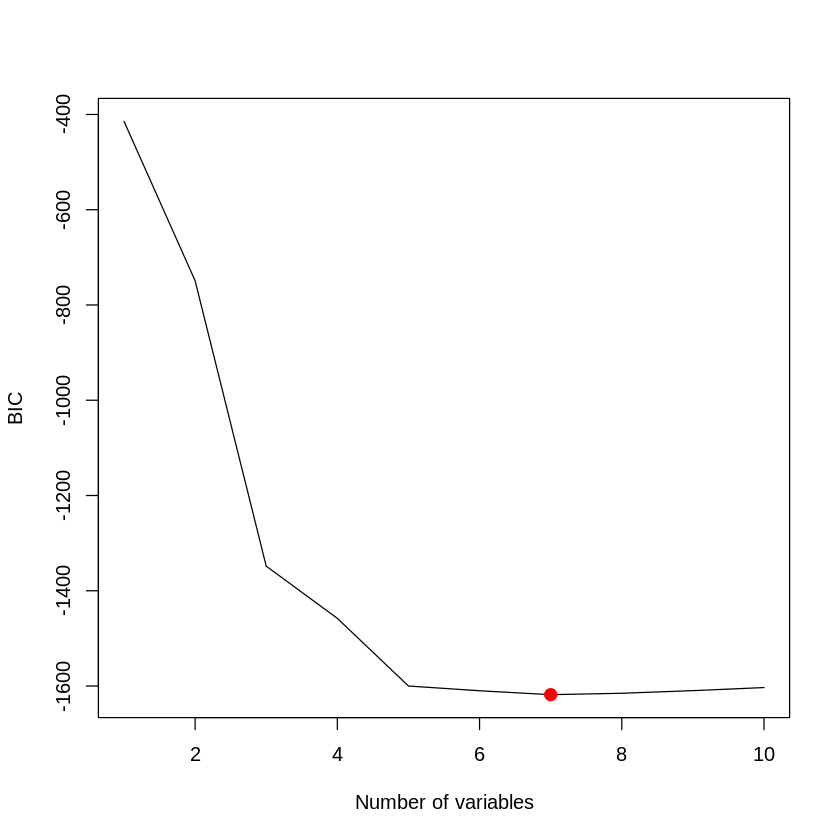

In [160]:
plot(reg.summary$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
minbic = which.min(reg.summary$bic)
points(minbic, reg.summary$bic[minbic], col = "red", cex = 2, pch = 20)
coef(regfit.full, minbic)

We can see the BIC suggests that only 7 variables be used

How about R^2

(Intercept) 
                                                                                                              2.813465e+01 
                                                                                                                num_people 
                                                                                                              8.774264e-01 
                                                                                                                 housearea 
                                                                                                              5.574007e-03 
                                                                                                                     is_ac 
                                                                                                              3.326930e+01 
                                                                                                                     is_tv 
                                                                                                              1.451094e+01 
                                                                                                                   is_flat 
                                                                                                              1.162641e+01 
                                                                                                              num_children 
                                                                                                              1.823884e+01 
                                                                                                                  is_urban 
                                                                                                              5.006276e+01 
                                                                                                                     month 
                                                                                                              2.098002e-01 
I((num_rooms + num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban + month)^2) 
                                                                                                              1.309163e-08

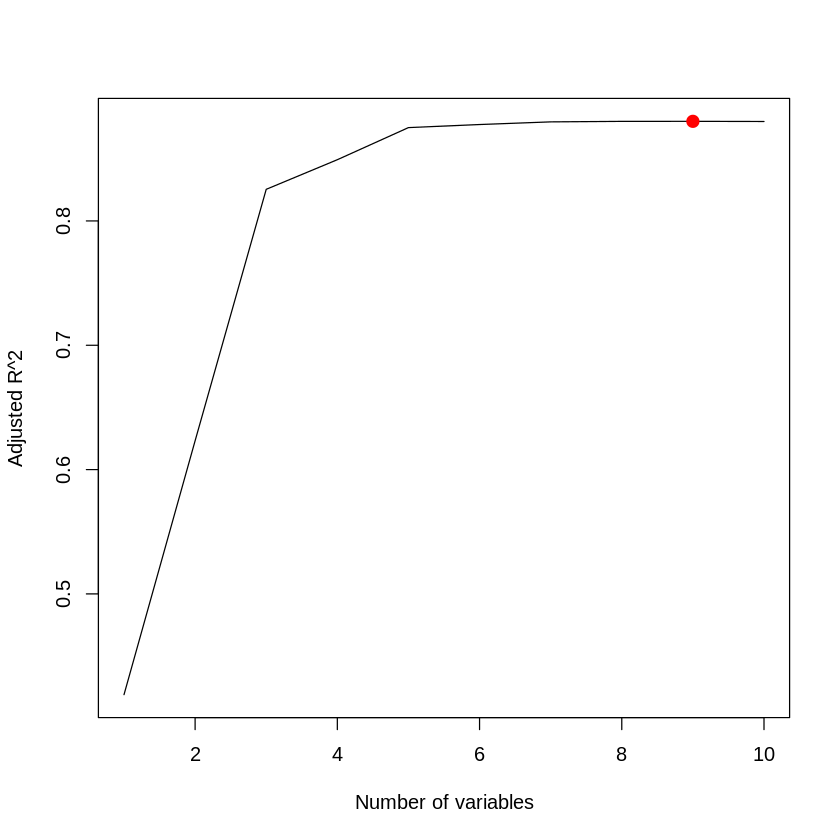

In [161]:
plot(reg.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
max_adjr2 = which.max(reg.summary$adjr2)
points(max_adjr2, reg.summary$adjr2[max_adjr2 ], col = "red", cex = 2, pch = 20)
coef(regfit.full, max_adjr2)

And the R^2 metric suggests we should use 9

Now we can try another stepwise model using the forward selection to get the best overall model

In [162]:
regfit.fwd <- regsubsets(amount_paid ~  num_rooms + num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban + month + 
I((num_rooms + num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban + month)^2) +
I((num_rooms + num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban + month)^3) + 
I((num_rooms + num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban + month)^4),
data = train, nvmax = 10, method = "forward")

In [163]:
reg.summary.fwd <- summary(regfit.fwd)
reg.summary.fwd 

Subset selection object
Call: regsubsets.formula(amount_paid ~ num_rooms + num_people + housearea + 
    is_ac + is_tv + is_flat + ave_monthly_income + num_children + 
    is_urban + month + I((num_rooms + num_people + housearea + 
    is_ac + is_tv + is_flat + ave_monthly_income + num_children + 
    is_urban + month)^2) + I((num_rooms + num_people + housearea + 
    is_ac + is_tv + is_flat + ave_monthly_income + num_children + 
    is_urban + month)^3) + I((num_rooms + num_people + housearea + 
    is_ac + is_tv + is_flat + ave_monthly_income + num_children + 
    is_urban + month)^4), data = train, nvmax = 10, method = "forward")
13 Variables  (and intercept)
                                                                                                                           Forced in
num_rooms                                                                                                                      FALSE
num_people                                                     

Get the same metric plots as previous with the added RSS plot which we know will decrease as the amount of variables increase

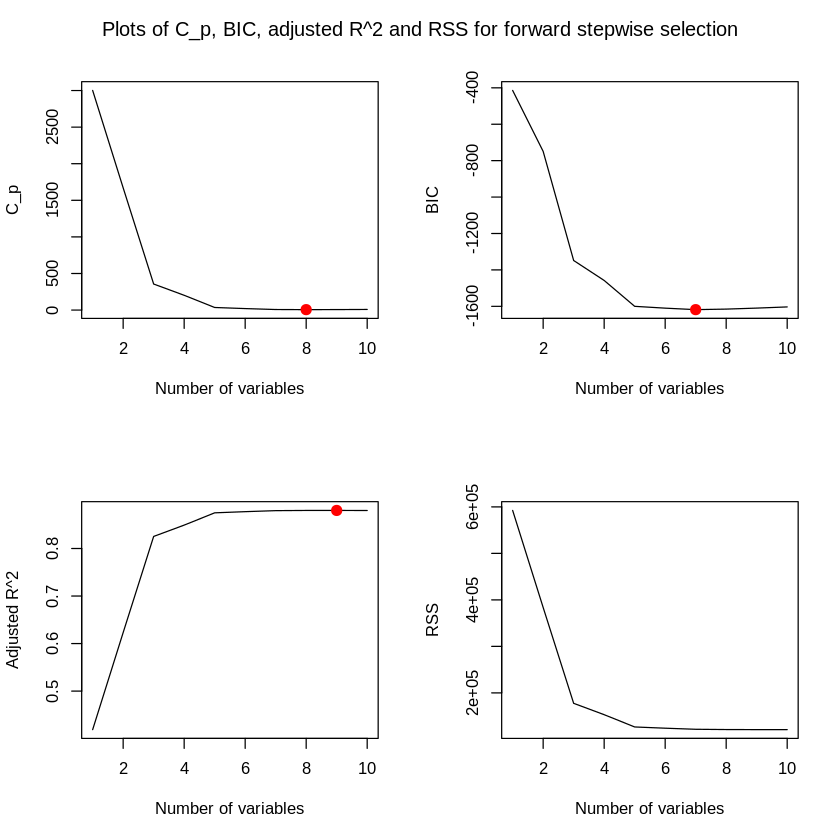

In [164]:
par(mfrow = c(2, 2))
plot(reg.summary.fwd$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary.fwd$cp), reg.summary.fwd$cp[which.min(reg.summary.fwd$cp)], col = "red", cex = 2, pch = 20)
plot(reg.summary.fwd$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary.fwd$bic), reg.summary.fwd$bic[which.min(reg.summary.fwd$bic)], col = "red", cex = 2, pch = 20)
plot(reg.summary.fwd$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary.fwd$adjr2), reg.summary.fwd$adjr2[which.max(reg.summary.fwd$adjr2)], col = "red", cex = 2, pch = 20)
plot(reg.summary.fwd$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for forward stepwise selection", side = 3, line = -2, outer = TRUE)

Now that we have completed the subset selection we can perform some other forms of regression, namely Lasso and Ridge Regression. We can then compare these subseted regression models with their full models and also compare them with the previously constructed models as well

In [165]:
train.mat <- model.matrix(amount_paid ~ num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban, data = train)[,-1]
test.mat <- model.matrix(amount_paid ~ num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban, data = test)[,-1]

In [166]:
grid <- 10^seq(4, -2, length = 100)

In [167]:
install.packages('glmnet')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [168]:
library(glmnet)

Ridge Regression

In [169]:
set.seed(1)# the purpose of fixing the seed of the random number generator is to make the result repeatable.
fit.ridge <- glmnet(train.mat, train$amount_paid, alpha = 0, lambda = grid, thresh = 1e-12)
cv.ridge <- cv.glmnet(train.mat, train$amount_paid, alpha = 0, lambda = grid, thresh = 1e-12)
bestlam.ridge <- cv.ridge$lambda.min
bestlam.ridge

[1] 0.08111308

In [170]:
# MSE
pred.ridge <- predict(fit.ridge, s = bestlam.ridge, newx = test.mat)
mean((pred.ridge - test$amount_paid)^2)

[1] 171.938

In [245]:
ridge.coef<-predict(fit.ridge, type = "coefficients", s = bestlam.ridge)[1:9,]
ridge.coef

(Intercept)         num_people          housearea              is_ac 
      2.693839e+01       8.736006e-01       6.263800e-03       3.321053e+01 
             is_tv            is_flat ave_monthly_income       num_children 
      1.432659e+01       1.156432e+01       3.621062e-04       1.817783e+01 
          is_urban 
      4.999523e+01

Lasso Regression

In [171]:
set.seed(1)# the purpose of fixing the seed of the random number generator is to make the result repeatable.
fit.lasso <- glmnet(train.mat, train$amount_paid, alpha = 1, lambda = grid, thresh = 1e-12)
cv.lasso <- cv.glmnet(train.mat, train$amount_paid, alpha = 1, lambda = grid, thresh = 1e-12)
bestlam.lasso <- cv.lasso$lambda.min
bestlam.lasso

[1] 0.01

In [172]:
# MSE
pred.lasso <- predict(fit.lasso, s = bestlam.lasso, newx = test.mat)
mean((pred.lasso - test$amount_paid)^2)

[1] 172.1237

In [246]:
lasso.coef<-predict(fit.lasso, type = "coefficients", s = bestlam.lasso)[1:9,]
lasso.coef

(Intercept)         num_people          housearea              is_ac 
      2.689777e+01       8.712263e-01       6.188035e-03       3.327355e+01 
             is_tv            is_flat ave_monthly_income       num_children 
      1.433149e+01       1.156925e+01       3.612707e-04       1.820977e+01 
          is_urban 
      5.009156e+01

Thus far the ridge regression has produced the lowest MSE, we can now compare the full set of variables for both Ridge and Lasso regression. We expect the MSE values of both of these to be higher than the ones just achieved

In [173]:
train.mat2 <- model.matrix(amount_paid ~ ., data = train)[,-1]
test.mat2 <- model.matrix(amount_paid ~ ., data = test)[,-1]

Full Ridge Regression

In [174]:
fit.ridge2 <- glmnet(train.mat2, train$amount_paid, alpha = 0, lambda = grid, thresh = 1e-12)
cv.ridge2 <- cv.glmnet(train.mat2, train$amount_paid, alpha = 0, lambda = grid, thresh = 1e-12)
bestlam.ridge2 <- cv.ridge2$lambda.min
bestlam.ridge2

[1] 0.1072267

In [175]:
# Training MSE
train_pred.ridge2 <- predict(fit.ridge2, s = bestlam.ridge2, newx = train.mat2)
mean((train_pred.ridge2 - train$amount_paid)^2)

[1] 153.9551

In [176]:
# Test MSE
pred.ridge2 <- predict(fit.ridge2, s = bestlam.ridge2, newx = test.mat2)
mean((pred.ridge2 - test$amount_paid)^2)

[1] 172.6518

In [177]:
# R2
ridge_R2 <- 1 - (sum((test$amount_paid-predict(fit.ridge2, s = bestlam.ridge2, newx = test.mat2))^2)/sum((test$amount_paid-mean(test$amount_paid))^2))
ridge_R2

[1] 0.8743029

Full Lasso Regression

In [178]:
fit.lasso2 <- glmnet(train.mat2, train$amount_paid, alpha = 1, lambda = grid, thresh = 1e-12)
cv.lasso2 <- cv.glmnet(train.mat2, train$amount_paid, alpha = 1, lambda = grid, thresh = 1e-12)
bestlam.lasso2 <- cv.lasso2$lambda.min
bestlam.lasso2

[1] 0.07054802

In [179]:
# Training MSE
train_pred.lasso2 <- predict(fit.ridge2, s = bestlam.ridge2, newx = train.mat2)
mean((train_pred.lasso2 - train$amount_paid)^2)

[1] 153.9551

In [180]:
# Train MSE
pred.lasso <- predict(fit.lasso2, s = bestlam.lasso2, newx = test.mat2)
mean((pred.lasso - test$amount_paid)^2)

[1] 172.7723

We can see for both, that the MSE values are larger than the ones achieved with the subsetted models

In [181]:
# R2
lasso_R2 <- 1 - (sum((test$amount_paid-predict(fit.lasso2, s = bestlam.lasso2, newx = test.mat2))^2)/sum((test$amount_paid-mean(test$amount_paid))^2))
lasso_R2

[1] 0.8742152

### 4.3 Non Linear Models

Next, we are going to try a non-linear model, we saw with the pairwise plots that there didn't look to be much of a linear relationship between amount_paid and many of the other predictors. Thus, we can try a non-linear approach and see how this type of model compares with the previous

The first non-linear model we can fit in the Polynomial Regression Model. This will create a regression model of a certain degree. To find the optimal degree we can use cross validation 

Polynomial Regression Model using Cross-validation

In [182]:
install.packages('ISLR')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [183]:
require(splines)
library(ISLR)
library(boot)

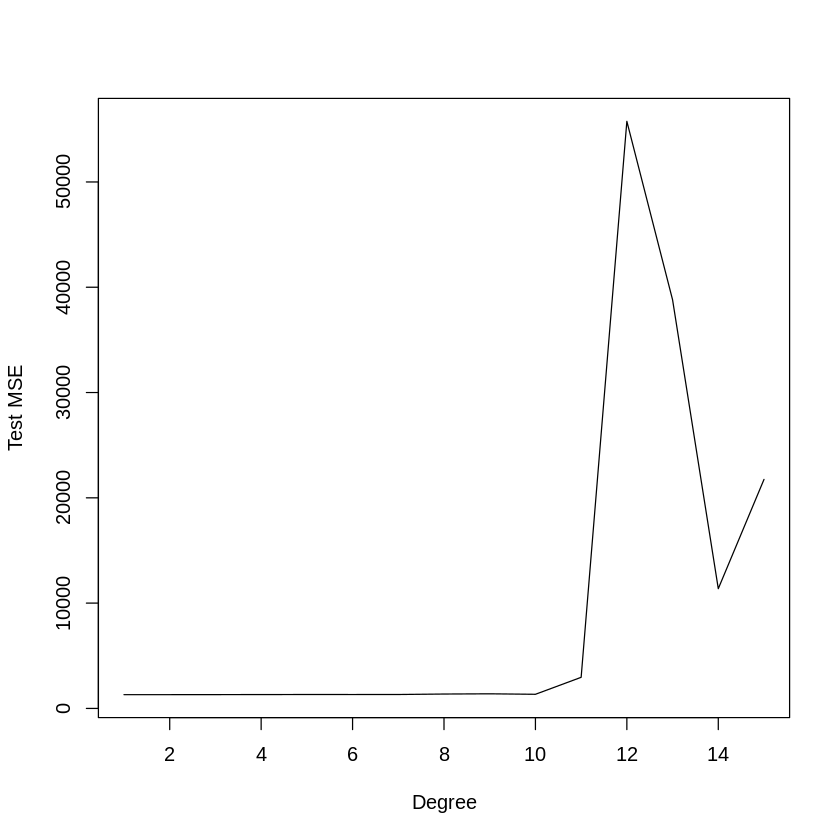

In [184]:
deltas <- rep(NA, 15)
for (i in 1:15) {
    fit <- glm(amount_paid ~ poly(num_people + housearea + is_ac + is_tv + 
    is_flat + ave_monthly_income + num_children + is_urban, i), data = train)
    deltas[i] <- cv.glm(train, fit, K = 20)$delta[1]
}
plot(1:15, deltas, xlab = "Degree", ylab = "Test MSE", type = "l")

In [185]:
new_fit_8 <- lm(amount_paid ~ poly(num_people + housearea + is_ac + is_tv + 
    is_flat + ave_monthly_income + num_children + is_urban, 8), data = train)
summary(new_fit_8)


Call:
lm(formula = amount_paid ~ poly(num_people + housearea + is_ac + 
    is_tv + is_flat + ave_monthly_income + num_children + is_urban, 
    8), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-99.648 -25.223  -0.791  26.470  97.503 

Coefficients:
                                                                                                          Estimate
(Intercept)                                                                                                120.095
poly(num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban, 8)1   18.823
poly(num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban, 8)2   21.693
poly(num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban, 8)3   -3.098
poly(num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban, 8)4  -15.863
poly(num_people + housearea + is_ac +

In [186]:
# Train MSE
pred.train_fit_8 <- predict(new_fit_8, train)
mean((pred.train_fit_8 - train$amount_paid)^2)

[1] 1294.421

In [187]:
# Test MSE
pred.new_fit_8 <- predict(new_fit_8, test)
mean((pred.new_fit_8 - test$amount_paid)^2)

[1] 1383.74

Based on these we can see that our MSE values are extremely high suggesting that our model is indeed linear. 

We can also check this once again using a General Additive Model. This is similar to the stepwise function done previously except with a non-linear approach

In [188]:
# R2
poly_R2 <- 1 - (sum((test$amount_paid-predict(new_fit_8, test))^2)/sum((test$amount_paid-mean(test$amount_paid))^2))
poly_R2

[1] -0.007415355

General Additive Model

In [189]:
set.seed(1)

In [190]:
fit <- regsubsets(amount_paid ~ num_people + housearea + is_ac + is_tv + 
    is_flat + ave_monthly_income + num_children + is_urban, data = train, nvmax = 10, method = "forward")
fit.summary <- summary(fit)
fit.summary

Subset selection object
Call: regsubsets.formula(amount_paid ~ num_people + housearea + is_ac + 
    is_tv + is_flat + ave_monthly_income + num_children + is_urban, 
    data = train, nvmax = 10, method = "forward")
8 Variables  (and intercept)
                   Forced in Forced out
num_people             FALSE      FALSE
housearea              FALSE      FALSE
is_ac                  FALSE      FALSE
is_tv                  FALSE      FALSE
is_flat                FALSE      FALSE
ave_monthly_income     FALSE      FALSE
num_children           FALSE      FALSE
is_urban               FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         num_people housearea is_ac is_tv is_flat ave_monthly_income
1  ( 1 ) " "        " "       " "   " "   " "     " "               
2  ( 1 ) " "        " "       " "   " "   " "     " "               
3  ( 1 ) " "        " "       "*"   " "   " "     " "               
4  ( 1 ) " "        " "       "*"   "*"   " "     " "      

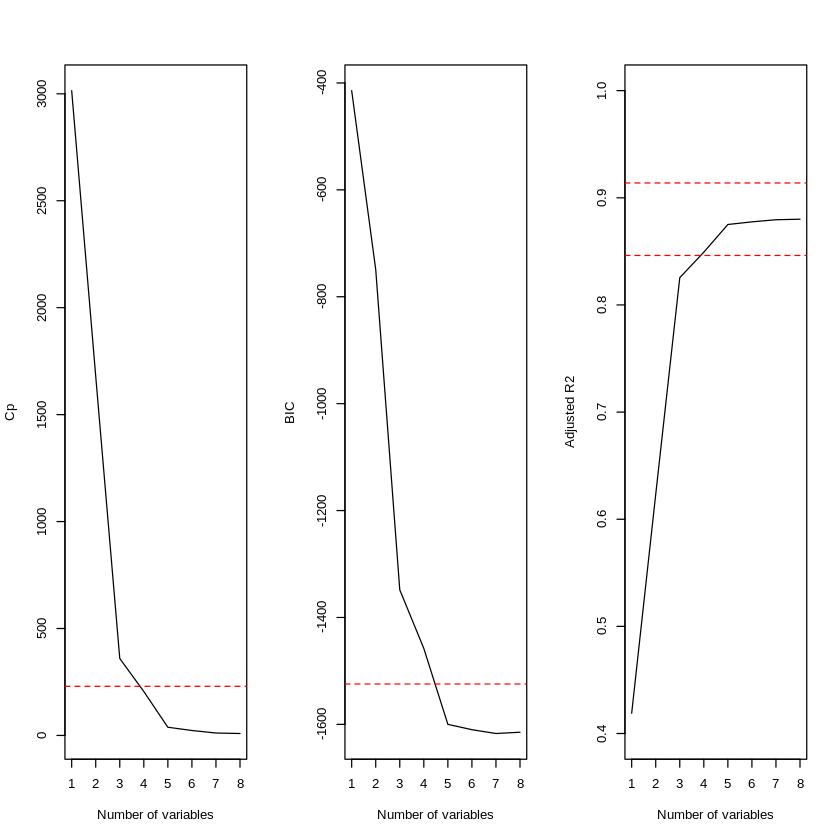

In [191]:
par(mfrow = c(1, 3))
plot(fit.summary$cp, xlab = "Number of variables", ylab = "Cp", type = "l")
min.cp <- min(fit.summary$cp)
std.cp <- sd(fit.summary$cp)
abline(h = min.cp + 0.2 * std.cp, col = "red", lty = 2)
abline(h = min.cp - 0.2 * std.cp, col = "red", lty = 2)
plot(fit.summary$bic, xlab = "Number of variables", ylab = "BIC", type='l')
min.bic <- min(fit.summary$bic)
std.bic <- sd(fit.summary$bic)
abline(h = min.bic + 0.2 * std.bic, col = "red", lty = 2)
abline(h = min.bic - 0.2 * std.bic, col = "red", lty = 2)
plot(fit.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R2", type = "l", ylim = c(0.4, 1))
max.adjr2 <- max(fit.summary$adjr2)
std.adjr2 <- sd(fit.summary$adjr2)
abline(h = max.adjr2 + 0.2 * std.adjr2, col = "red", lty = 2)
abline(h = max.adjr2 - 0.2 * std.adjr2, col = "red", lty = 2)

Looks like 5 variables is ideal

In [192]:
install.packages("gam")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [193]:
library(gam)

In [194]:
fit <- regsubsets(amount_paid ~ ., data = train, method = "forward")
coeffs <- coef(fit, id = 5)
names(coeffs)

[1] "(Intercept)"  "is_ac"        "is_tv"        "is_flat"      "num_children"
[6] "is_urban"

Fit a GAM

In [195]:
gam.fit <- gam(amount_paid ~ is_ac + is_tv + is_flat + s(num_children, df = 2) + is_urban, data = train)

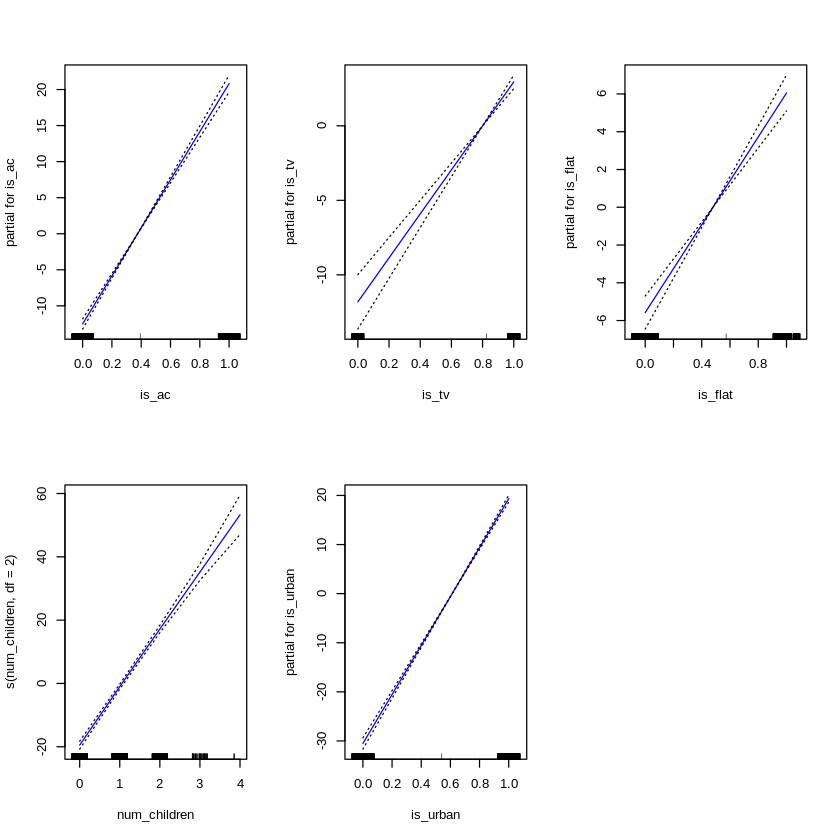

In [196]:
par(mfrow = c(2, 3))
plot(gam.fit, se = T, col = "blue")

In [197]:
# Train MSE
train_gam.preds <- predict(gam.fit, train)
train_gam.err <- mean((train$amount_paid - train_gam.preds)^2)
train_gam.err

[1] 161.1683

In [198]:
# Test MSE
gam.preds <- predict(gam.fit, test)
gam.err <- mean((test$amount_paid - gam.preds)^2)
gam.err

[1] 183.1371

In [199]:
gam.tss = mean((test$amount_paid - mean(test$amount_paid))^2)
test.rss = 1 - gam.err/gam.tss
test.rss

[1] 0.8666692

In [200]:
summary(gam.fit)


Call: gam(formula = amount_paid ~ is_ac + is_tv + is_flat + s(num_children, 
    df = 2) + is_urban, data = train)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-27.8139 -10.0284  -0.2398  10.1218  28.8428 

(Dispersion Parameter for gaussian family taken to be 162.6165)

    Null Deviance: 1020752 on 785 degrees of freedom
Residual Deviance: 126678.3 on 779 degrees of freedom
AIC: 6241.376 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
                         Df Sum Sq Mean Sq F value    Pr(>F)    
is_ac                     1 155240  155240  954.64 < 2.2e-16 ***
is_tv                     1  35088   35088  215.77 < 2.2e-16 ***
is_flat                   1  27561   27561  169.49 < 2.2e-16 ***
s(num_children, df = 2)   1 215060  215060 1322.50 < 2.2e-16 ***
is_urban                  1 461198  461198 2836.11 < 2.2e-16 ***
Residuals               779 126678     163                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0

Thus we can see the MSE result gathered from the GAM is higher than those of the previous stepwise models, reiterating that a non linear approach isn't the way to go in this scenario

In [201]:
Gam_R2 <- 1 - (sum((test$amount_paid-predict(gam.fit, test))^2)/sum((test$amount_paid-mean(test$amount_paid))^2))
Gam_R2

[1] 0.8666692

### 4.4 Tree Based Methods

The final method that is going to be explored in this assignment is that of tree-based methods. Methods such as Random Forests which take a subset of the predictors and continually learns and takes the average of several trees and Boosting which takes learnings from previous trees as well 

In [202]:
install.packages("tree")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [203]:
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [204]:
install.packages("gbm", dependencies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [205]:
#load all the libraries
library(tree)
library(randomForest)
library(glmnet)
library(gbm)
library(ISLR)

Build a tree representation

In [206]:
tree = tree(amount_paid ~ num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban, data = train ) 

In [207]:
summary(tree)


Regression tree:
tree(formula = amount_paid ~ num_people + housearea + is_ac + 
    is_tv + is_flat + ave_monthly_income + num_children + is_urban, 
    data = train)
Variables actually used in tree construction:
[1] "is_urban"     "is_ac"        "num_children"
Number of terminal nodes:  10 
Residual mean deviance:  263 = 204100 / 776 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-49.3800 -11.3700   0.6275   0.0000  11.9700  62.5100 

In [208]:
tree

node), split, n, deviance, yval
      * denotes terminal node

 1) root 786 1021000 120.10  
   2) is_urban < 0.5 305  217800  90.78  
     4) is_ac < 0.5 178   88430  78.22  
       8) num_children < 1.5 117   35100  67.81 *
       9) num_children > 1.5 61   16330  98.19 *
     5) is_ac > 0.5 127   61990 108.40  
      10) num_children < 1.5 95   25170 100.00 *
      11) num_children > 1.5 32   10410 133.20 *
   3) is_urban > 0.5 481  374500 138.70  
     6) is_ac < 0.5 313  164500 126.80  
      12) num_children < 1.5 216   71940 117.50  
        24) num_children < 0.5 98   23080 107.10 *
        25) num_children > 0.5 118   29580 126.10 *
      13) num_children > 1.5 97   32070 147.60 *
     7) is_ac > 0.5 168   83940 160.80  
      14) num_children < 1.5 120   33520 151.00  
        28) num_children < 0.5 55   11050 140.40 *
        29) num_children > 0.5 65   10960 160.00 *
      15) num_children > 1.5 48   10360 185.20 *

null device 
          1

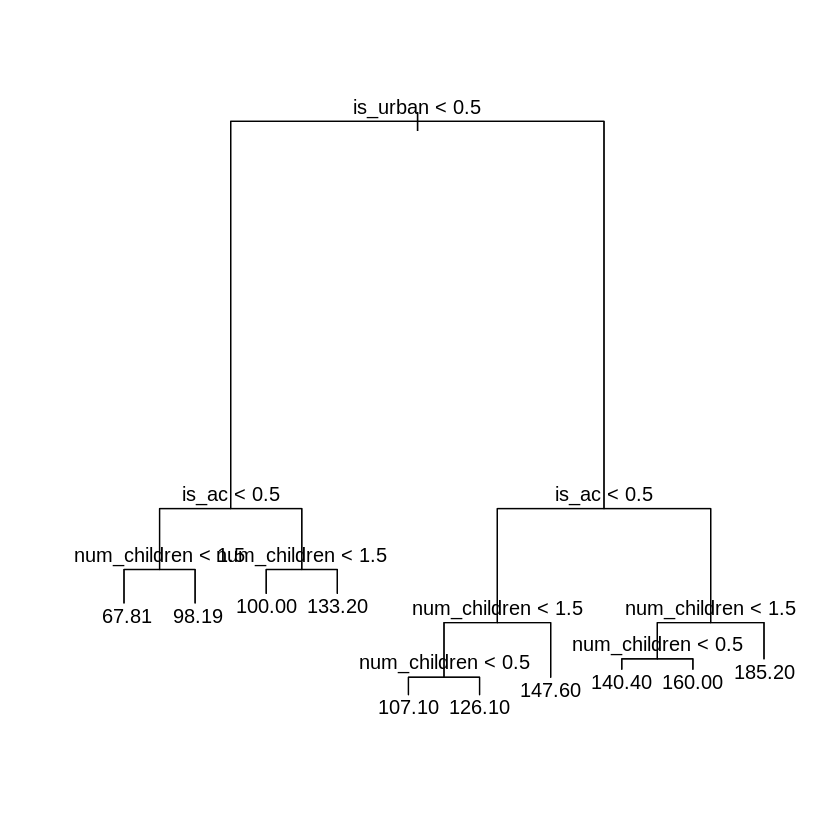

In [209]:
plot(tree)
text(tree, pretty = 0)
dev.off()

Predict the response on the test data, and produce the confusion matrix comparing the test labels to the predicted test labels.

In [210]:
y_hat = predict( tree, newdata= test)

In [211]:
head(y_hat)

1         2         3         4         5         6 
126.11851 126.11851  67.81113 107.14301 126.11851 107.14301

In [212]:
CM = table( y_hat, test$amount_paid )   # confusion matrix
print(CM)

                  
y_hat              17.5704 30.5613 41.8315 44.9184 45.1659 54.0519 54.3383
  67.8111256410257       1       1       1       1       1       1       0
  98.1878983606557       0       0       0       0       0       0       0
  100.004846315789       0       0       0       0       0       0       1
  107.143012244898       0       0       0       0       0       0       0
  126.118511864407       0       0       0       0       0       0       0
  133.2202               0       0       0       0       0       0       0
  140.375138181818       0       0       0       0       0       0       0
  147.560557731959       0       0       0       0       0       0       0
  160.033298461539       0       0       0       0       0       0       0
  185.20524375           0       0       0       0       0       0       0
                  
y_hat              54.5148 54.5583 54.6292 57.1411 59.9984 60.648 61.1999
  67.8111256410257       1       1       1       1       1     

Error Rate

In [213]:
print( ( CM[1,2] + CM[2,1] ) / sum(CM) )

[1] 0.005025126


Boosting

Perform boosting on the training set with 1000 trees for a range of values of the shrinkage parameter $\lambda$.
Produce twos plots:
* one with different shrinkage values on the x-axis and the corresponding **training set MSE** on the y-axis.
* one with different shrinkage values on the x-axis and the corresponding **testing set MSE** on the y-axis.

In [214]:
set.seed(1)

#  genernate values for lambdas
pows = seq(-10, -0.2, by = 0.1)

lambdas = 10^pows

length.lambdas = length(lambdas)

# save the results
train.errors = rep(NA, length.lambdas)
test.errors = rep(NA, length.lambdas)

In [215]:
for (i in 1:length.lambdas) {
    
#     1. fit the boosting model with different lambda
    boost.hitters = gbm(amount_paid ~ num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban, data = train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[i])
#     2. get results on training set
    train.pred = predict(boost.hitters, train, n.trees = 1000)
#     3. get results on testing data
    test.pred = predict(boost.hitters, test, n.trees = 1000)
#     4. save the MSE
    train.errors[i] = mean((train$amount_paid - train.pred)^2)
    test.errors[i] = mean((test$amount_paid - test.pred)^2)
}

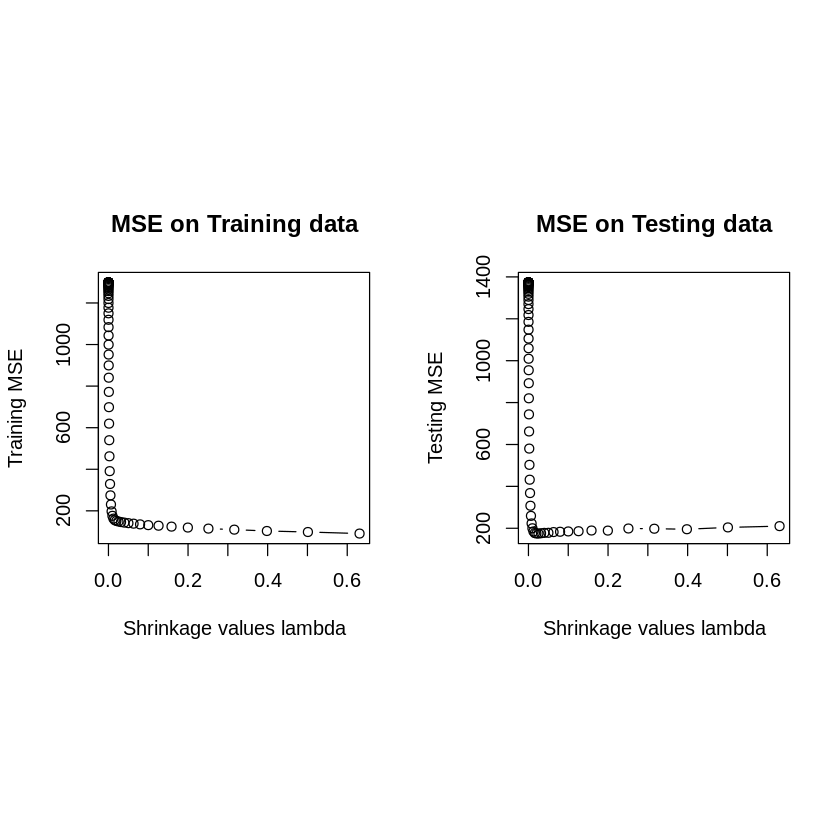

In [216]:
par(mfcol=c(1,2),  pty = "s")
plot(lambdas, train.errors, type = "b", xlab = "Shrinkage values lambda", ylab = "Training MSE",main = "MSE on Training data")
plot(lambdas, test.errors, type = "b", xlab = "Shrinkage values lambda", ylab = "Testing MSE",main = "MSE on Testing data")
# par("fig")

In [217]:
# Train MSE
min(train.errors)

[1] 90.78926

In [218]:
# Test MSE
min(test.errors)

[1] 174.7897

In [219]:
lambdas[which.min(test.errors)]

[1] 0.02511886

Which variables appear to be the most important predictors in the boosted model

,var,rel.inf
,<chr>,<dbl>
is_urban,is_urban,45.9252749
num_children,num_children,23.8522678
is_ac,is_ac,20.2176413
is_tv,is_tv,3.2532139
is_flat,is_flat,3.2154527
housearea,housearea,1.2581152
ave_monthly_income,ave_monthly_income,1.2462230
num_people,num_people,0.7259031
month,month,0.1695645


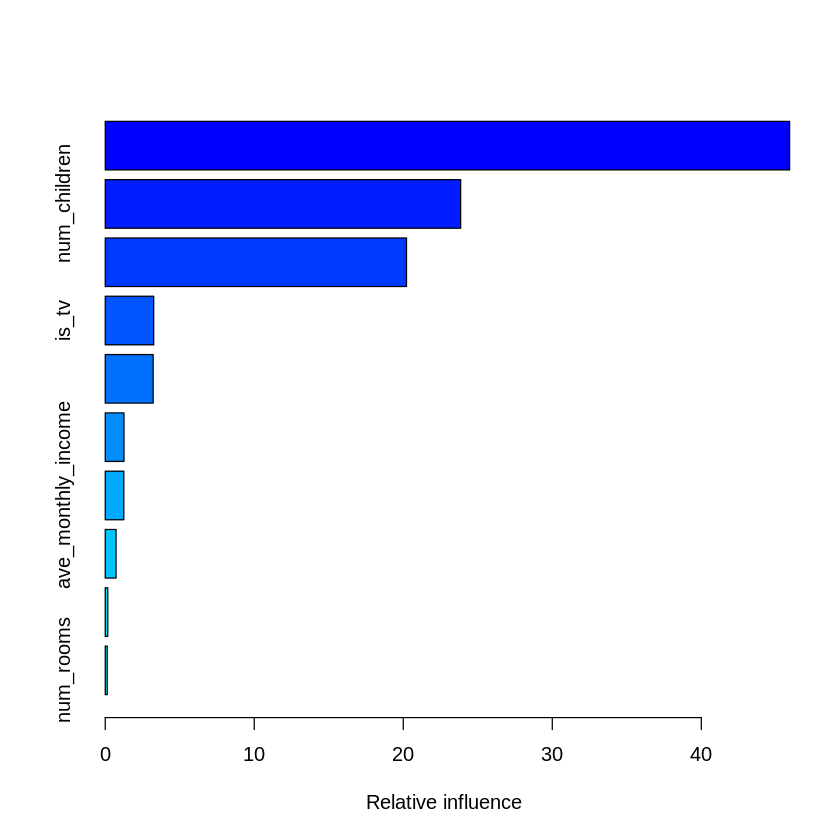

In [234]:
# build the full boosting model with the best lambda

boost.hitters1 <- gbm(amount_paid ~ num_rooms + num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban + month, data = train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[which.min(test.errors)])
summary(boost.hitters1)

,var,rel.inf
,<chr>,<dbl>
is_urban,is_urban,46.4522930
num_children,num_children,23.3777066
is_ac,is_ac,20.0114528
is_tv,is_tv,3.3459575
is_flat,is_flat,3.2150674
housearea,housearea,1.4178361
ave_monthly_income,ave_monthly_income,1.3744045
num_people,num_people,0.8052821


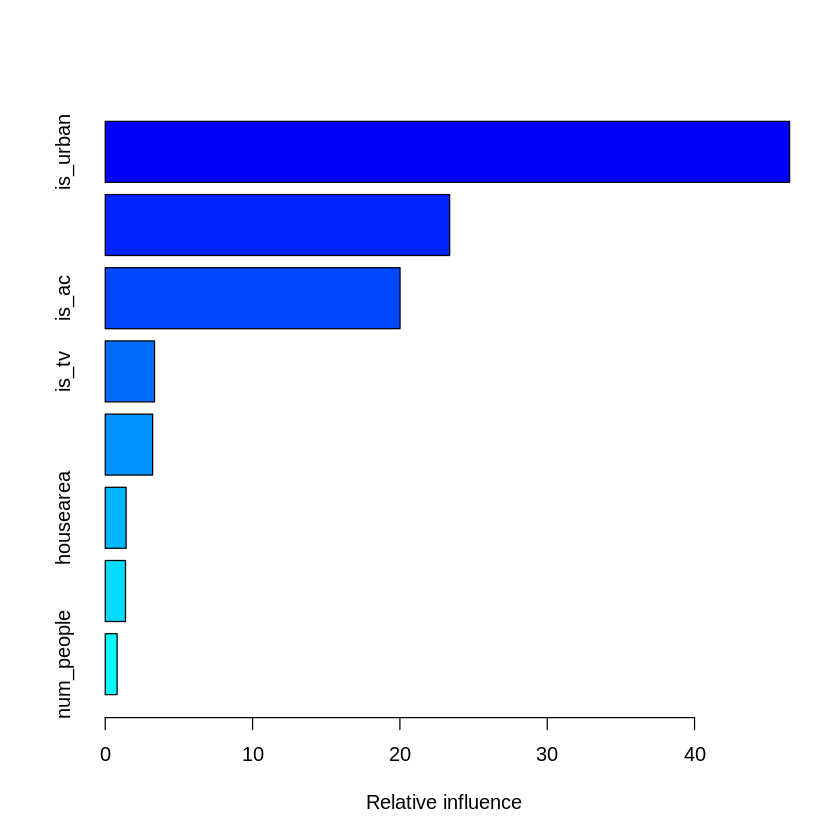

In [220]:
# build the subset boosting model with the best lambda

boost.hitters <- gbm(amount_paid ~ num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban, data = train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[which.min(test.errors)])
summary(boost.hitters)

Random Forest

Finally fit a Random Forest Model and predict amount_paid

In [221]:
set.seed(1)

bag.hitters <- randomForest(amount_paid ~ num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban, data = train, mtry = 3, ntree = 500)

yhat.bag <- predict(bag.hitters, newdata = test)

mean((yhat.bag - test$amount_paid)^2)  # Test MSE

[1] 203.0282

In [222]:
yhat.bag2 <- predict(bag.hitters, newdata = train)
mean((yhat.bag2 - train$amount_paid)^2) # Train MSE

[1] 67.82424

In [223]:
# R2
R2 <- 1 - (sum((test$amount_paid-yhat.bag)^2)/sum((test$amount_paid-mean(test$amount_paid))^2))
R2

[1] 0.8521877

## 5. Results and discussion <a class="anchor" id="sec_6"></a>

Now that we have created several models, we can now compare each of them and discuss some of the advantages and disadvantages of each model. We can also discuss the predictors and which predictors seem to be more important than others and thus have a more significant impact that others.

In [232]:
columns = c('Model', 'Predictors', 'Training MSE', 'Test MSE', 'R squared')
linear_regression = c('Mutliple Linear Regression', 'num_rooms + num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban + month', mean((train_pred.lm - train$amount_paid)^2), mean((pred.lm - test$amount_paid)^2), model_R2)
stepwise_model = c('Multiple Linear Regression Stepwise Model', 'num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban', mean((train_step_pred.lm - train$amount_paid)^2), mean((pred.step - test$amount_paid)^2), step_R2)
ridge_regression = c('Ridge Regression', 'num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban', mean((train_pred.ridge2 - train$amount_paid)^2), mean((pred.ridge - test$amount_paid)^2), ridge_R2)
lasso_regression = c('Lasso Regression', 'num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban',mean((train_pred.lasso2 - train$amount_paid)^2),  mean((pred.lasso - test$amount_paid)^2), lasso_R2)
polynomial_regression = c('Polynomial Regression', 'num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban', mean((pred.train_fit_8 - train$amount_paid)^2), mean((pred.new_fit_8 - test$amount_paid)^2), -poly_R2)
gam = c('General Additive Model', 'is_ac + is_tv + is_flat + num_children + is_urban', train_gam.err, mean((test$amount_paid - gam.preds)^2), Gam_R2)
boosting = c('Boosting Model', 'num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban', min(train.errors), min(test.errors), 'NA')
randomforest = c('Random Forst', 'num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban', mean((yhat.bag2 - train$amount_paid)^2), mean((yhat.bag - test$amount_paid)^2), R2)

In [233]:
df = data.frame(columns, linear_regression, stepwise_model, ridge_regression, lasso_regression, polynomial_regression, gam, boosting, randomforest)
names(df) <- NULL
df2 = t(df)
df2

Model,Predictors,Training MSE,Test MSE,R squared
Mutliple Linear Regression,num_rooms + num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban + month,153.943787301395,172.844584954412,0.874162530075867
Multiple Linear Regression Stepwise Model,num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban,154.228763600399,172.087075504126,0.874714025933795
Ridge Regression,num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban,153.955120578174,171.938001823343,0.874302902029169
Lasso Regression,num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban,153.955120578174,172.772300454224,0.874215155957209
Polynomial Regression,num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban,1294.42074330673,1383.73958946072,0.00741535534665871
General Additive Model,is_ac + is_tv + is_flat + num_children + is_urban,161.16828941952,183.137130071161,0.866669163495055
Boosting Model,num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban,90.7892632102488,174.789742613908,NA
Random Forst,num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban,67.8242435995318,203.028203837291,0.852187700870905


Just above we have created a table of the various models developed, the relative predictors used to predict the response variable of amount_paid and a few of the relevant statistical results. The best MSE score was generated by Ridge Regression using the subseted amount of predictors. Also to note that both Ridge and Lasso Regression full models were developed with the full set of predictors which resulted in higher scores of MSE, and were omitted from the final result. We can also see that the stepwise model that the Training MSE is larger than that of Multiple Linear Regression suggesting that the orginal model could have been overfitted.

In addition, some other models look as though they may be overfitted as well. Both the Boosting Model and the Random Forest Models have very low Training MSE values as compared to the other models but have comparativly higher Test MSE scores. This suggests that both of these models may have been overfitted with the training data for this result to occur.

Further, looking at the non linear models developed, we can see that both the Polynomial Regression and the General Additive Model performed poorly when predicting the response variable. This implies that the response variable could have and should used a linear method to predict and not a non linear method. This was also justified when looking at the residual plots of the first linear models, we saw little to no pattern in the linear model residuals suggesting that a linear model was indeed a good option in this scenario.

The other metric looked at is the R squared value on the test data. The R squared value explains the variability encapsulated by the model, a value closer to 1 is ideal as it would explain all the variability and a result close to 0 would explain none of the variability. In this scenario, most of the models have a generally similar R squared value meaning that most of the models explain roughly the same amount of the variability in the results. We can see that the Polynomial Model has a terrible R squared value suggesting that is doesn't explain the variability, coupled with its bad MSE scores suggests once more that a non linear model, specificially a polynomial model would not be a good choice to predict amount_paid 

Lastly, we want to discuss the which attributes are significant attributes in terms of impact on the response variable and which subset of attributes had the most impact. From the Linear Regression Model to the Stepwise Model, we saw that the amount of predictors when from 10 to 8. We saw that the attributes of num_rooms and month were dropped and proved to be insignificant. This was also verified by the correlations showing that these two predictors had little to no correlation with amount_paid. In addition, using the Boosted Model, these two attributes had the lowest relative affect on amount_paid using the full model and were omitted from the subsetted Boosted model. Reasons as to why the month is an insignificant variable could be due to electricity being used all year round, ac used to cool in summer and used to heat in the winter could suggest why month specifically isn't an important variable. The num_rooms variable which describes the num of rooms in a house was also not statistically important, this could be due to the main rooms of the house using electricity not being in those specific rooms. Places such as the kitchen, lounge and overall the ac and amount of outlet will probably have more of an impact on the bill than the number of bedrooms and thus could be why the number of rooms is insignificant. 

Now moving on to the most signinficant attributes, we can see below that in the Stepwise model, the largest coefficient was that of is_urban variable, which describes if a house is an urban area or not, suggesting the variables in the most significant for the model. Additionally, in the boosted model, we can also see that is_urban has the largest relative affect and is thus the most significant variable once again. This would play an important role logically since you would expect larger house in urban areas to use more electricity than smaller house and apartments that are present in metropolitan areas. We can also see simialrities across these models for the least significant variables with ave_monthly_income, housearea and num_people being the bottom 3 variables in both models after the removal of num_rooms and month. Then taking a look at both the Ridge Regression and Lasso Regression, based on the coefficients, we can see the same results as the previous models that is_urban is the clear most significant variable and the same variables with the lowest impact. These variables have the least significant statistical impact, the ave_monthly_income having no impact makes sense as this seems to be independent on electricity usage, but could infer the size of the house, likewise housearea may not impact electrcity use directly as many rooms may not be used or have electical capacity. The num_people in the house not impacting the amount_paid is a bit of a suprise as num_children was shown to have more statistical impact but this could be due to the people, more likely adults working during the day and not being at home as much as the children. Children spending more time at home could lead to an increased usage in electrical appliances causing a larger rise in bill as opposed to the adults.

Finally, we have noticed that the after removing the statistically insignificant attributes in num_rooms and month, that the model was improved. Hence the Linear Regression Model to the Stepwise Model. Although we have now seen that the new lowest significant variables have remained constant throughout the process thereby after. However, with the General Additive Model, it was suggested that the number of predictors be reduced to 5 to improve the model. The attributes of ave_monthly_income, housearea and num_people were removed from this model being the 3 least significant but this result is a worse model in both Training MSE and Test MSE suggesting that these attributes though are the least significant are still indeed needed to make the best model to predict amount_paid

Therefore the subset of variables that are the most significant to predict amount_paid were (in no particular order) num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban and these produced the best results

In [239]:
# Stepwise Function Coefficients
sort(step1$coefficients)

ave_monthly_income          housearea         num_people            is_flat 
      3.634613e-04       6.249463e-03       8.758272e-01       1.159031e+01 
             is_tv       num_children        (Intercept)              is_ac 
      1.435349e+01       1.822059e+01       2.673775e+01       3.329569e+01 
          is_urban 
      5.011413e+01

,var,rel.inf
,<chr>,<dbl>
is_urban,is_urban,45.5158945
num_children,num_children,23.8953756
is_ac,is_ac,20.3875742
is_tv,is_tv,3.4253364
is_flat,is_flat,3.2213670
ave_monthly_income,ave_monthly_income,1.4736484
housearea,housearea,1.3692458
num_people,num_people,0.7115581


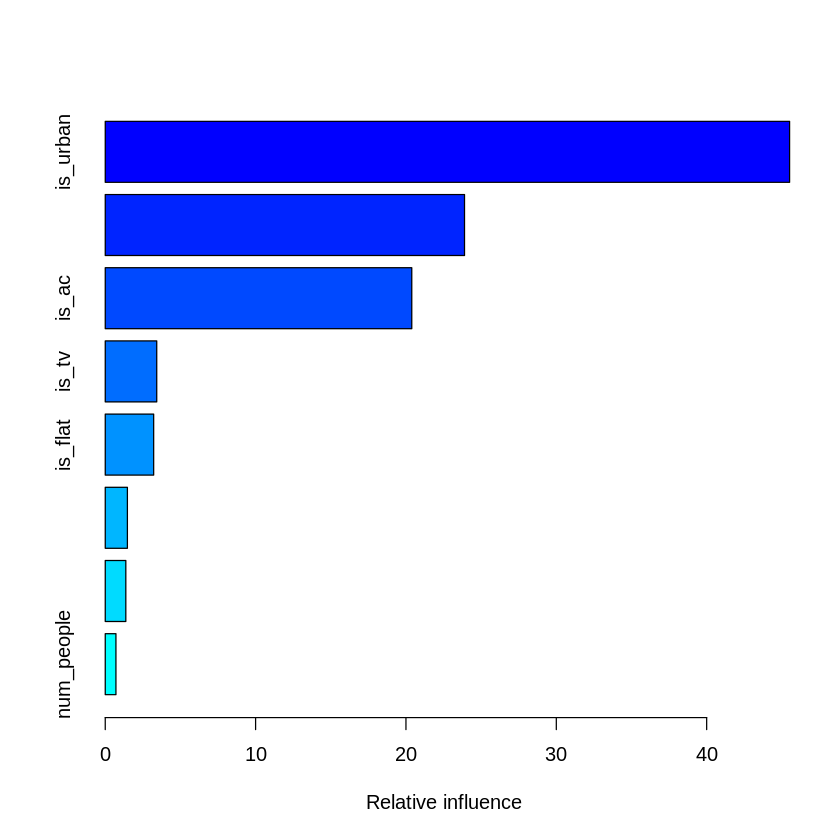

In [240]:
# Relative Inference of variables Boosted Model
boost.hitters <- gbm(amount_paid ~ num_people + housearea + is_ac + is_tv + is_flat + ave_monthly_income + num_children + is_urban, data = train, distribution = "gaussian", n.trees = 1000, shrinkage = lambdas[which.min(test.errors)])
summary(boost.hitters)

In [250]:
# Ridge Regression Coefficients
sort(ridge.coef)

ave_monthly_income          housearea         num_people            is_flat 
      3.621062e-04       6.263800e-03       8.736006e-01       1.156432e+01 
             is_tv       num_children        (Intercept)              is_ac 
      1.432659e+01       1.817783e+01       2.693839e+01       3.321053e+01 
          is_urban 
      4.999523e+01

In [251]:
# Lasso Regression Coefficients
sort(lasso.coef)

ave_monthly_income          housearea         num_people            is_flat 
      3.612707e-04       6.188035e-03       8.712263e-01       1.156925e+01 
             is_tv       num_children        (Intercept)              is_ac 
      1.433149e+01       1.820977e+01       2.689777e+01       3.327355e+01 
          is_urban 
      5.009156e+01

## 6. Conclusion<a class="anchor" id="sec_7"></a>

To conclude, this task was investigating the rise of electricity bills and the attributes that contribute to it. This task involved some data preprocessing, model development, before a discussion of the result and significant variables. The most significant variable found to influence the response variable, amount_paid, was the variable is_urban describing if the house was in an urban area or not with the best overall model being the Ridge Regression Model which using Regularization methods to improve the model

## 7. References <a class="anchor" id="sec_8"></a>

- Frost. J. (2022). Identifying the Most Important Independent Variables in Regression Models. Stats By Jim. Retreived from https://statisticsbyjim.com/regression/identifying-important-independent-variables/#:~:text=Standardized%20coefficients%20and%20the%20change,from%20a%20purely%20statistical%20standpoint. 
- Frost. J. (2019). Model Specification: Choosing the Best Regression Model. Stats By Jim. Retreived from https://statisticsbyjim.com/regression/model-specification-variable-selection/
- Shubham. J. (2017). A comprehensive beginners guide for Linear, Ridge and Lasso Regression in Python and R. Analytics Vidhya. Retrieved from https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/ 
- Week 1 Tutorial: Welcome to Applied Data Analysis!. (2022). FIT5149 Applied Data Analysis. Monash University 
- Week 2 Tutorial: Exploratory Data Analysis on Wine Quality. (2022). FIT5149 Applied Data Analysis. Monash University 
- Week 3 Tutorial: Linear regression. (2022). FIT5149 Applied Data Analysis. Monash University 
- Week 4 Tutorial: Classification. (2022). FIT5149 Applied Data Analysis. Monash University 
- Week 5 Tutorial: Resampling Methods (2022). FIT5149 Applied Data Analysis. Monash University 
- Week 6 Tutorial: Linear Model Selection and Regularization. (2022). FIT5149 Applied Data Analysis. Monash University 
- Week 7 Tutorial: Non Linear Model. (2022). FIT5149 Applied Data Analysis. Monash University 
- Week 8 Tutorial: Tree-based Methods. (2022). FIT5149 Applied Data Analysis. Monash University 